In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np


excel_file_path = '/content/drive/MyDrive/dataset/data1.xlsx'

# Read the Excel file into a DataFrame
datalegti = pd.read_excel(excel_file_path,sheet_name='legtimate')
dataphish = pd.read_excel(excel_file_path,sheet_name='phish')

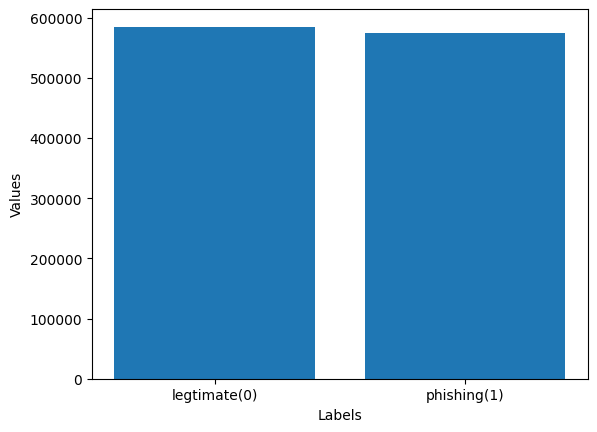

<Figure size 2000x1800 with 0 Axes>

[584909 573964]


In [3]:
import matplotlib.pyplot as plt

x = ['legtimate(0)', 'phishing(1)']
y = [len(datalegti), len(dataphish)]
x = np.array(x)
y = np.array(y)
plt.bar(x,y)
plt.xlabel('Labels')
plt.ylabel('Values')
plt.figure(figsize=(20, 18))
plt.show()
print(y)

In [4]:
data1 = pd.concat([datalegti, dataphish], ignore_index=True)

In [5]:
data1.head()

,url,label
0,http://www.google.com,0
1,http://www.youtube.com,0
2,http://www.facebook.com,0
3,http://www.baidu.com,0
4,http://www.wikipedia.org,0


In [6]:
dataphish.head()

,url,label
0,http://www.03sq.cn/qlogin,1
1,http://95588.ocla.pw,1
2,http://95588.oclo.pw,1
3,http://95588.olsoa.com,1
4,http://95588.v1n.pw,1


In [7]:
df = data1.copy()

In [8]:
import re
import matplotlib.pyplot as plt
from urllib.parse import urlsplit
import seaborn as sns
def ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

def getLength(url):
  return len(url)

def specialSymbols(df):

  symbolsList = ['_','&','~','"',"'",'@','?','-','=','.','#','%','+','$','!','*',',','//','/',';',':','>','<','^','[',']','{','}','(',')']
  for symbol in symbolsList:
     df[f"URL_{symbol}"] = df['url'].apply(lambda i: i.count(symbol))


def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

# trả về số lượng chữ số
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

# trả  về số lượng chữ cái
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

# kiểm tra xem có địa chỉ email khong?


def EmailAddress(url):
    if re.findall(r'[\w\.-]+@[\w\.-]+', url):  #[\w\.-] biểu thức chính quy gồm kí tự , dấu . và -
        return 1
    else:
        return 0

def https(url):
    try:
        parsed_url = urlsplit(url)
        if parsed_url.scheme == 'https':
            return 1
        else:
            return 0
    except ValueError:
        return 0

def http(url):
    try:
        parsed_url = urlsplit(url)
        if parsed_url.scheme == 'http':
            return 1
        else:
            return 0
    except ValueError:
        return 0
def ftp(url):
    try:
        parsed_url = urlsplit(url)
        if parsed_url.scheme == 'ftp':
            return 1
        else:
            return 0
    except ValueError:
        return 0


def vowels_count(url):
    vowels = ['a', 'e', 'i', 'o', 'u']
    count = 0
    for i in vowels:
        count += url.lower().count(i)
    return count

In [9]:
df['ip_address'] = df['url'].apply(ip_address)
specialSymbols(df)
df["length"] = df["url"].apply(getLength)
df['Shortining'] = df['url'].apply(Shortining_Service)
df['digits_in_url']= df['url'].apply(digit_count)
df['letters_in_url']= df['url'].apply(letter_count)
df['email_address']= df['url'].apply(EmailAddress)
df['https'] = df['url'].apply(https)
df['http'] = df['url'].apply(http)
df['ftp'] = df['url'].apply(ftp)
df['vowels_url']= df['url'].apply(vowels_count)

<ipython-input-10-0f46d5d80df4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), linewidths=.5)


<Axes: >

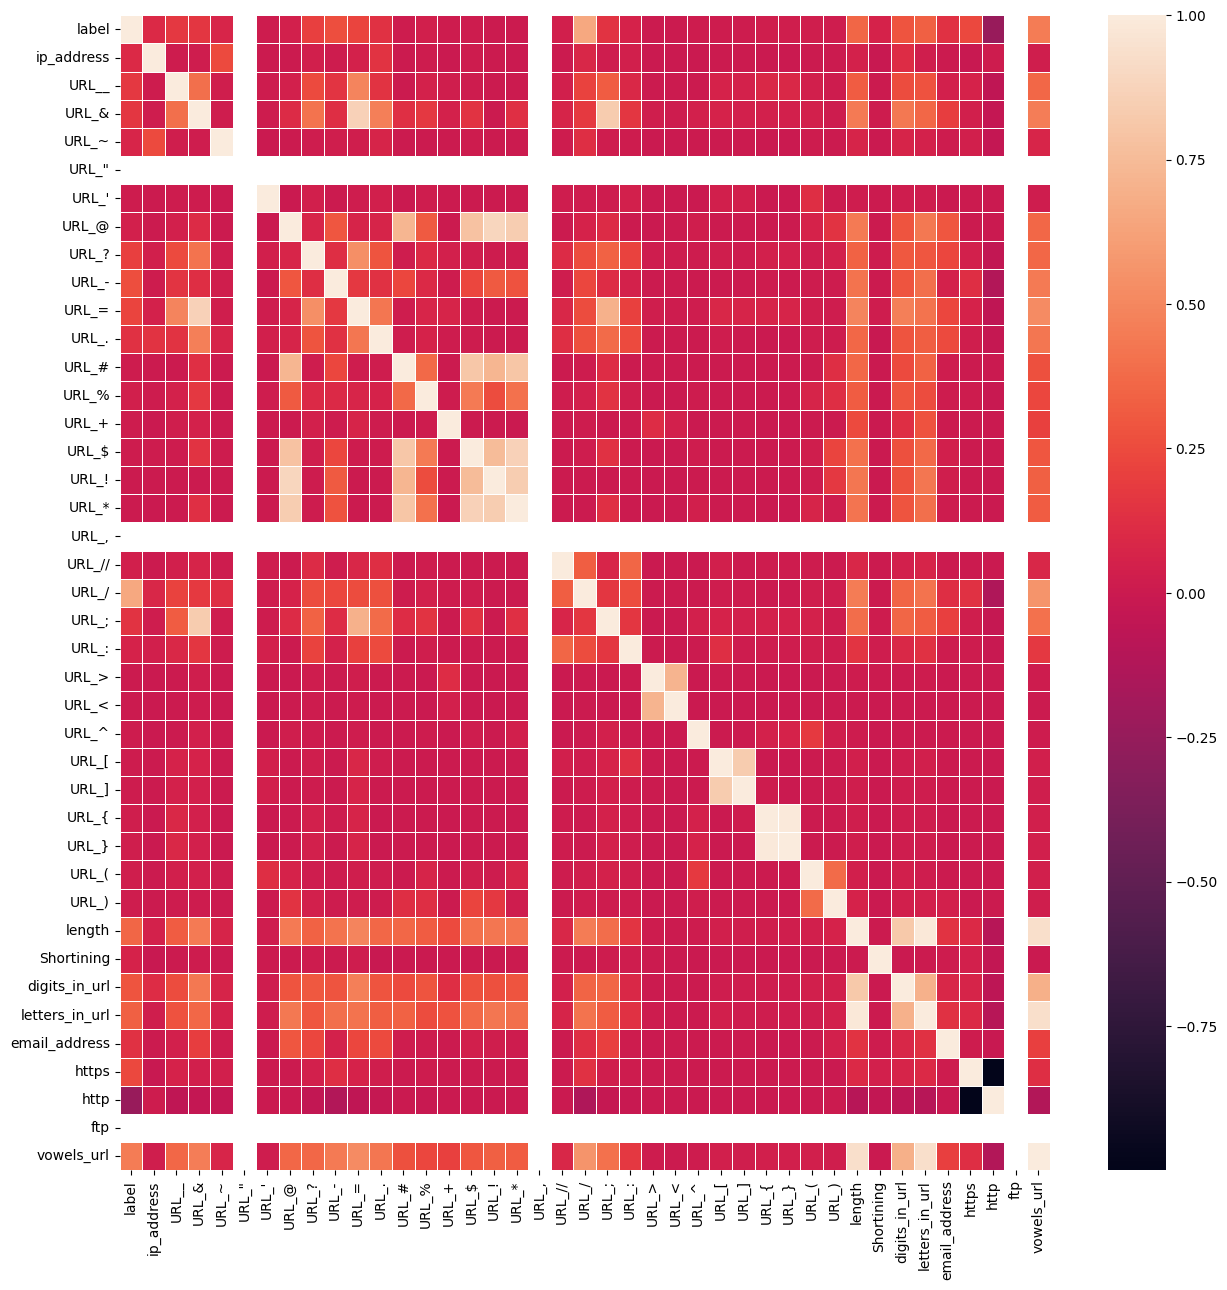

In [10]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), linewidths=.5)

In [11]:
df.head()

,url,label,ip_address,URL__,URL_&,URL_~,"URL_""",URL_',URL_@,URL_?,...,URL_),length,Shortining,digits_in_url,letters_in_url,email_address,https,http,ftp,vowels_url
0,http://www.google.com,0,0,0,0,0,0,0,0,0,...,0,21,0,0,16,0,0,1,0,4
1,http://www.youtube.com,0,0,0,0,0,0,0,0,0,...,0,22,0,0,17,0,0,1,0,5
2,http://www.facebook.com,0,0,0,0,0,0,0,0,0,...,0,23,0,0,18,0,0,1,0,5
3,http://www.baidu.com,0,0,0,0,0,0,0,0,0,...,0,20,0,0,15,0,0,1,0,4
4,http://www.wikipedia.org,0,0,0,0,0,0,0,0,0,...,0,24,0,0,19,0,0,1,0,6


In [12]:
df.shape

(1158873, 42)

In [13]:
X = df.drop(['url','label','URL_"','URL_,', 'ftp'],axis=1)#,'type_code'
y = df['label']

In [14]:
from sklearn.model_selection import train_test_split

# stratify - make sure classes are evenlly represented across splits
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.8)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

input_shape = [X_train[1].shape]
print("Input shape is ", input_shape)

print(X_train.shape)
print(X_train)

Input shape is  [(37, 1)]
(927098, 37, 1)
[[[ 0]
  [ 0]
  [ 0]
  ...
  [ 0]
  [ 1]
  [12]]

 [[ 0]
  [ 0]
  [ 0]
  ...
  [ 0]
  [ 1]
  [15]]

 [[ 0]
  [ 0]
  [ 0]
  ...
  [ 0]
  [ 1]
  [ 4]]

 ...

 [[ 0]
  [ 0]
  [ 0]
  ...
  [ 0]
  [ 1]
  [ 6]]

 [[ 1]
  [ 0]
  [ 0]
  ...
  [ 0]
  [ 1]
  [ 0]]

 [[ 0]
  [ 0]
  [ 0]
  ...
  [ 0]
  [ 1]
  [ 8]]]


In [15]:
from tensorflow import keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, BatchNormalization, Conv1D, MaxPooling1D
from tensorflow.keras.layers import LSTM, Dropout, Flatten, Dense

model = Sequential()
model.add(BatchNormalization(input_shape=input_shape[0]))
model.add(Conv1D(filters=64,kernel_size=7,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 37, 1)             4         
 Normalization)                                                  
                                                                 
 conv1d (Conv1D)             (None, 31, 64)            512       
                                                                 
 batch_normalization_1 (Bat  (None, 31, 64)            256       
 chNormalization)                                                
                                                                 
 max_pooling1d (MaxPooling1  (None, 15, 64)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 64)            0         
                                                        

In [16]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(0.001),
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [17]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.0001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=512,
    epochs=20,
    callbacks=[early_stopping],
)

Epoch 1/20
1449/1449 [==============================] - 24s 11ms/step - loss: 0.1180 - binary_accuracy: 0.9599 - val_loss: 0.9695 - val_binary_accuracy: 0.5434
Epoch 2/20
1449/1449 [==============================] - 15s 11ms/step - loss: 0.0796 - binary_accuracy: 0.9739 - val_loss: 0.1261 - val_binary_accuracy: 0.9649
Epoch 3/20
1449/1449 [==============================] - 15s 10ms/step - loss: 0.0734 - binary_accuracy: 0.9766 - val_loss: 0.0758 - val_binary_accuracy: 0.9777
Epoch 4/20
1449/1449 [==============================] - 15s 10ms/step - loss: 0.0704 - binary_accuracy: 0.9781 - val_loss: 0.1353 - val_binary_accuracy: 0.9565
Epoch 5/20
1449/1449 [==============================] - 15s 10ms/step - loss: 0.0680 - binary_accuracy: 0.9794 - val_loss: 0.0994 - val_binary_accuracy: 0.9689
Epoch 6/20
1449/1449 [==============================] - 15s 11ms/step - loss: 0.0675 - binary_accuracy: 0.9796 - val_loss: 0.0726 - val_binary_accuracy: 0.9775
Epoch 7/20
1449/1449 [==================

Best Validation Loss: 0.0590
Best Validation Accuracy: 0.9823


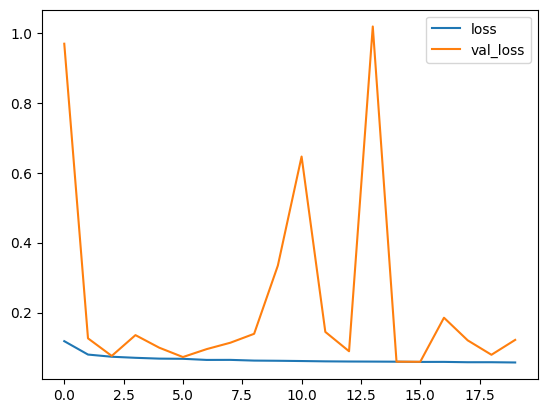

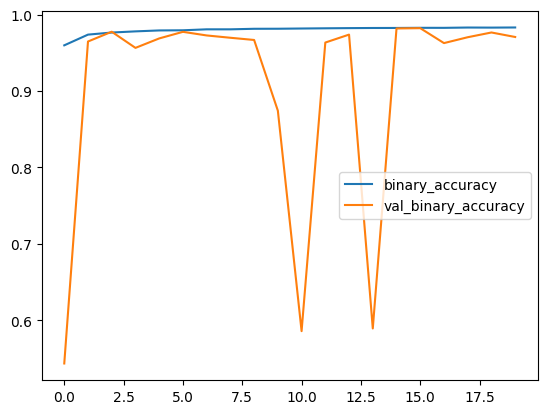

In [18]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 0
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))

In [19]:
model.evaluate(X_test,y_test)

7243/7243 [==============================] - 26s 4ms/step - loss: 0.1231 - binary_accuracy: 0.9700


[0.12313921749591827, 0.9700356125831604]

In [20]:
import pandas as pd
test_data = ['https://www.youtube.com/watch?v=ODoLZTHMyZk',
             'http://www.bankofamerica-com-login-sys-working-update.com/Update/7cd90061e939fdb2f310b4ee38c53970/signonSetup.php',
             'https://www.facebook.com/watch/?ref=tab'
             ]
df1 = pd.DataFrame({'url': test_data})

In [21]:
df1['ip_address'] = df1['url'].apply(ip_address)
specialSymbols(df1)
df1["length"] = df1["url"].apply(getLength)
df1['Shortining'] = df1['url'].apply(Shortining_Service)
df1['digits_in_url']= df1['url'].apply(digit_count)
df1['letters_in_url']= df1['url'].apply(letter_count)
df1['email_address']= df1['url'].apply(EmailAddress)
df1['https'] = df1['url'].apply(https)
df1['http'] = df1['url'].apply(http)
df1['ftp'] = df1['url'].apply(ftp)
df1['vowels_url']= df1['url'].apply(vowels_count)
X1 = df1.drop(['url','URL_"','URL_,', 'ftp'],axis=1)#,
X1 = np.expand_dims(X1, axis=2)

In [22]:
model.predict(X1)

1/1 [==============================] - 0s 465ms/step


array([[0.99889463],
       [0.9982864 ],
       [0.9985858 ]], dtype=float32)